In [ ]:
#RNN Classification

In [355]:
pip install imbalanced-learn

In [398]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Embedding
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import sequence
import plotly.express as px
from sklearn.metrics import classification_report, accuracy_score, recall_score
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [230]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [399]:
df = pd.read_excel('/content/gdrive/MyDrive/maintainability/Refs/FreeMindRefactoringsAndTDRefAll.xlsx')
df.drop(columns=df.columns[0], axis=1,  inplace=True)

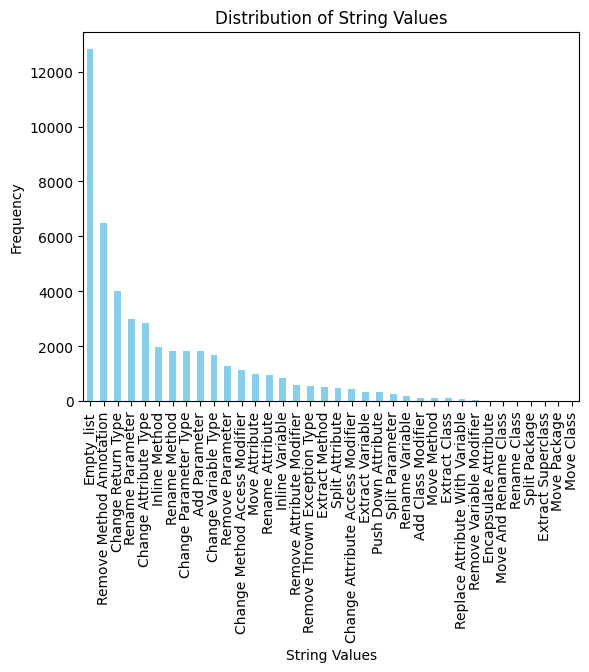

In [325]:
df['Types'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of String Values')
plt.xlabel('String Values')
plt.ylabel('Frequency')
plt.show()

In [326]:
# Get value counts and create a DataFrame
value_counts_df = df['Types'].value_counts().reset_index()
value_counts_df.columns = ['String Values', 'Frequency']

# Display the table
print(value_counts_df)

                       String Values  Frequency
0                         Empty_list      12816
1           Remove Method Annotation       6478
2                 Change Return Type       4006
3                   Rename Parameter       2981
4              Change Attribute Type       2862
5                      Inline Method       1988
6                      Rename Method       1846
7              Change Parameter Type       1823
8                      Add Parameter       1811
9               Change Variable Type       1696
10                  Remove Parameter       1289
11     Change Method Access Modifier       1131
12                    Move Attribute       1005
13                  Rename Attribute        962
14                   Inline Variable        840
15         Remove Attribute Modifier        586
16      Remove Thrown Exception Type        555
17                    Extract Method        520
18                   Split Attribute        469
19  Change Attribute Access Modifier    

In [400]:
le = LabelEncoder()
df['severity'] = le.fit_transform(df['severity'])
df['type'] = le.fit_transform(df['type'])
df['Types'] = le.fit_transform(df['Types'])

In [402]:
train, test = train_test_split(df, test_size=0.2)

In [403]:
features = df.columns[:-1]
X = train[features] # her we are droping the output feature as this is the target and 'X' is input features, the changes are not
                                # made inplace as we have not used 'inplace = True'
y = train['Types'] # Output/Dependent variable
XTest = test[features]
YTest = test['Types']

In [404]:
X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')

In [405]:
#norms = np.linalg.norm(X, axis=1, keepdims=True)
#X = X / norms
min_val = 0.0
max_val = 36.0

# Check if values are outside the interval and set them to 0.0
X[(X < min_val) | (X > max_val)] = 0.0

X = np.nan_to_num(X, nan=0.0)

In [406]:
sampling_strategy = {0: 1500, 1: 1500, 2: 1800}
over = SMOTE(sampling_strategy=sampling_strategy)
under = RandomUnderSampler(sampling_strategy=sampling_strategy)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)

In [407]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [408]:
print(set(np.unique(X_test)))
print(set(np.unique(y_test)))

{0.0, 1.0, 1.1653394, 1.0095733, 1.1433725, 1.2465189, 1.2794074, 1.2795646, 1.305495, 1.3714136, 1.443483, 1.4532353, 1.5216721, 1.6540537, 1.6731477, 1.8323413, 2.0, 2.1488614, 2.51436, 2.518508, 3.0, 3.0840344, 3.231963, 3.2794073, 3.2825081, 3.3579419, 4.0, 5.0, 5.233516, 20.0, 21.0, 6.0, 24.0, 25.0, 27.0, 30.0, 7.0, 32.0, 34.0, 8.0, 8.095901, 8.096789, 9.0, 9.180797, 9.430734, 10.0, 11.0, 12.0, 13.0, 13.073956, 13.106019, 13.203373, 13.246519, 13.389948, 13.892429, 13.965987, 14.0, 14.185707, 14.494372, 14.759254, 15.0, 3.4209764, 3.443483, 3.4531767, 3.6540537, 3.9914749, 16.0, 17.0, 18.0, 19.0, 20.124033, 20.753248, 20.998665, 22.0}
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 13.0, 14.0, 15.0, 16.0, 17.0, 19.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0}


In [409]:
max_review_length = 3
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [410]:
y_train = to_categorical(y_train, num_classes=36)
y_test = to_categorical(y_test, num_classes=36)

In [411]:
# create the model
embedding_vecor_length = 50
model = Sequential()
model.add(Embedding(input_dim=100, output_dim=embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(36, activation='softmax'))  # Use softmax for multi-class classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_50 (Embedding)    (None, 3, 50)             5000      
                                                                 
 lstm_58 (LSTM)              (None, 100)               60400     
                                                                 
 dense_58 (Dense)            (None, 36)                3636      
                                                                 
Total params: 69036 (269.67 KB)
Trainable params: 69036 (269.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/3
579/579 [==============================] - 9s 10ms/step - loss: 2.7464 - accuracy: 0.2624 - val_loss: 2.6857 - val_accuracy: 0.2651
Epoch 2/3
579/579 [==============================] - 5s 9ms/step - loss: 2.6383 - accuracy: 0.2740 - val_loss: 2.6416 - val_accuracy

In [412]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 27.70%


In [413]:
embedding_vector_features = 50
model = Sequential()
model.add(Embedding(len(X_train),embedding_vector_features,input_length=3))

model.add(LSTM(128,input_shape=(X_train.shape),activation='relu',return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(128,activation='tanh'))

model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(36,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_51 (Embedding)    (None, 3, 50)             1850350   
                                                                 
 lstm_59 (LSTM)              (None, 3, 128)            91648     
                                                                 
 dropout_24 (Dropout)        (None, 3, 128)            0         
                                                                 
 lstm_60 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_59 (Dense)            (None, 32)                4128      
                                                                 
 dropout_26 (Dropout)        (None, 32)              

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64)

Epoch 1/50
579/579 [==============================] - 34s 51ms/step - loss: 2.7960 - accuracy: 0.2562 - val_loss: 2.6572 - val_accuracy: 0.2639
Epoch 2/50
579/579 [==============================] - 28s 48ms/step - loss: 2.6462 - accuracy: 0.2709 - val_loss: 2.6138 - val_accuracy: 0.2712
Epoch 3/50
579/579 [==============================] - 29s 50ms/step - loss: 2.6073 - accuracy: 0.2780 - val_loss: 2.5952 - val_accuracy: 0.2755
Epoch 4/50
579/579 [==============================] - 29s 50ms/step - loss: 2.5908 - accuracy: 0.2807 - val_loss: 2.5898 - val_accuracy: 0.2765
Epoch 5/50
579/579 [==============================] - 28s 49ms/step - loss: 2.5835 - accuracy: 0.2813 - val_loss: 2.5828 - val_accuracy: 0.2763
Epoch 6/50
579/579 [==============================] - 28s 48ms/step - loss: 2.5788 - accuracy: 0.2814 - val_loss: 2.5748 - val_accuracy: 0.2768
Epoch 7/50
579/579 [==============================] - 31s 53ms/step - loss: 2.5708 - accuracy: 0.2812 - val_loss: 2.5721 - val_accuracy:

In [341]:
results = model.evaluate(X_test,y_test)

120/120 [==============================] - 1s 6ms/step - loss: 2.5134 - accuracy: 0.2806


In [342]:
predictions = model.predict(X_test)

120/120 [==============================] - 2s 9ms/step


In [343]:
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = to_categorical(predicted_labels, num_classes=36)
predicted_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [344]:
object1_first_column = predictions[:, 0]
accuracy = accuracy_score(y_test, predicted_labels)
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.15      0.02      0.03       133
           2       0.00      0.00      0.00        47
           3       0.85      0.13      0.22       219
           4       0.00      0.00      0.00        93
           5       0.00      0.00      0.00       143
           6       0.00      0.00      0.00       330
           7       0.20      0.02      0.03       123
           8       0.29      0.96      0.44       980
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        39
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00        34
          14       0.00      0.00      0.00       182
          15       0.00      0.00      0.00        69
          16       0.00      0.00      0.00         0
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
